In [3]:
# intersectional analysis
import subprocess
import pandas as pd 
import os
import glob

parent = '/home/jkim/research/peds_cxr/'
gpu = "2"
predefined_seeds = [9,17,18,29,30,34,41,42,51,52,61,66,74,75,78,81,84,86,87,89,90,92,96,98,99]

# batch creating result directiory
for seed in predefined_seeds:
    for dir in ['OM', 'OF', 'YM', 'YF']:
        # Construct the new directory path for results
        new_result_dir = parent + f"25variation/results/aggregate/test/intersection/{dir}/aggregate_{seed}_{dir}/"
        
        # Create the new directory if it doesn't exist
        if not os.path.exists(new_result_dir):
            os.makedirs(new_result_dir)

for seed in predefined_seeds:
    aggregate_metadata_path = parent + '25variation/metadata/final/aggregate/aggregate_metadata_seed_' + str(seed) + '.csv'
    aggregate_metadata = pd.read_csv(aggregate_metadata_path)
    
    # Convert 'Patient Age' to integers
    aggregate_metadata['Patient Age'] = pd.to_numeric(aggregate_metadata['Patient Age'], errors='coerce')

    # Creating aggregate_test_young / old .txt
    groups = ['YM', 'OM', 'YF', 'OF']
    for age_group in groups:
        if age_group == 'YM':
            test_index = aggregate_metadata[(aggregate_metadata['Set'] == 'test') & (aggregate_metadata['Patient Age'] >= 0) & (aggregate_metadata['Patient Age'] <= 5) & (aggregate_metadata['Patient Gender']=='M')]
        elif age_group == 'OM':
            test_index = aggregate_metadata[(aggregate_metadata['Set'] == 'test') & (aggregate_metadata['Patient Age'] >= 6) & (aggregate_metadata['Patient Age'] <= 18) & (aggregate_metadata['Patient Gender']=='M')]
        elif age_group == 'YF':
            test_index = aggregate_metadata[(aggregate_metadata['Set'] == 'test') & (aggregate_metadata['Patient Age'] >= 0) & (aggregate_metadata['Patient Age'] <= 5) & (aggregate_metadata['Patient Gender']=='F')]
        elif age_group == 'OF':
            test_index = aggregate_metadata[(aggregate_metadata['Set'] == 'test') & (aggregate_metadata['Patient Age'] >= 6) & (aggregate_metadata['Patient Age'] <= 18) & (aggregate_metadata['Patient Gender']=='F')]    
        else:  # 'old'
            print(f'Invalid group seed {seed}')
        
        image_source = parent + '25variation/images/aggregate/aggregate_' + str(seed) + '/'
        aggregate_test_output = image_source + 'aggregate_test_'+ age_group +'.txt'
        aggregate_test_txt = test_index['Image Index']
        aggregate_test_txt.to_csv(aggregate_test_output, sep=',', index=False, header=False)

In [4]:
# testing 25 aggregate models - DenseNet121_lr0.01_bs16_optSGD_wd0.0001_sch_step_pp3_bp5_trtrain.txt_vaval.txt_tfpeds_nlbatch_do0.0_1705144996.txt
import os
import subprocess
import pandas as pd 
import glob

sexs = ['YM', 'OM', 'YF', 'OF']
# Testing M vs F
for sex in sexs:
    for seed in predefined_seeds:
    # Build the pattern to search for model files
        search_pattern = os.path.join(parent, f"25variation/results/aggregate/train/aggregate_{seed}/DenseNet121_lr0.01_bs16_optSGD_wd1e-05_sch_step_pp3_bp5_trtrain.txt_vaval.txt_tfpeds_nlbatch_do0.5_*_model.pt")
        
        # Use glob to find the file
        matching_files = glob.glob(search_pattern)
        
        # Check if any matching files are found
        if not matching_files:
            print(f"No matching model files found for seed {seed}.")
            continue  # Skip to the next iteration

        # Assuming there's only one matching file, take the first one
        model_file_path = matching_files[0]

        image_source = parent + f'25variation/images/aggregate/aggregate_{seed}/' 
        command = [
            "python3",
            parent + "transformer-radiographs/test_cxr.py",
            "--cfg-dir", parent + f"25variation/images/aggregate/aggregate_{seed}/cfg_aggregate_{seed}.json",
            "--dataset", f'aggregate_{seed}',
            "--labels-set", "labels",
            "--model-state", model_file_path,
            "--model-type", "DenseNet121",
            "--results-dir", parent + f"25variation/results/aggregate/test/intersection/{sex}/aggregate_{seed}_{sex}",
            "--test-file", image_source + "aggregate_test_" + sex + ".txt",
            "--use-gpus", gpu
    ]

        # Run the command
        try:
            subprocess.run(command, check=True)
        except subprocess.CalledProcessError as e:
            print(f"An error occurred while executing the command: {e}")


Test set: starting load
Using image path file
Using no transforms
Loaded 874 images
Device: cuda #: 1 #cpus: 128

dict_keys(['aggregate_9_DenseNet121_aggregate_test_YM'])

Test set: starting load
Using image path file
Using no transforms
Loaded 874 images
Device: cuda #: 1 #cpus: 128

dict_keys(['aggregate_17_DenseNet121_aggregate_test_YM'])

Test set: starting load
Using image path file
Using no transforms
Loaded 874 images
Device: cuda #: 1 #cpus: 128

dict_keys(['aggregate_18_DenseNet121_aggregate_test_YM'])

Test set: starting load
Using image path file
Using no transforms
Loaded 874 images
Device: cuda #: 1 #cpus: 128

dict_keys(['aggregate_29_DenseNet121_aggregate_test_YM'])

Test set: starting load
Using image path file
Using no transforms
Loaded 874 images
Device: cuda #: 1 #cpus: 128

dict_keys(['aggregate_30_DenseNet121_aggregate_test_YM'])

Test set: starting load
Using image path file
Using no transforms
Loaded 874 images
Device: cuda #: 1 #cpus: 128

dict_keys(['aggregate

In [7]:
import pickle
import pandas as pd
import os 
import glob

# setting directories
parent = '/home/jkim/research/peds_cxr/'

sexs = ['YM', 'OM', 'YF', 'OF']
sex_file_name = ['_YM', '_OM', '_YF', '_OF']
for sex, sex_name in zip(sexs, sex_file_name):
    for seed in predefined_seeds:
        # Build the pattern to search for model files
            search_pattern = os.path.join(parent, f"25variation/results/aggregate/test/intersection/{sex}/aggregate_{seed}_{sex}/DenseNet121_lr0.01_bs16_optSGD_wd1e-05_sch_step_pp3_bp5_trtrain.txt_vaval.txt_tfpeds_nlbatch_do0.5_*.pkl")
        
            # Use glob to find the file
            matching_files = glob.glob(search_pattern)
            
            # Check if any matching files are found
            if not matching_files:
                print(f"No matching model files found for seed {seed}.")
                continue  # Skip to the next iteration

            pkl_directory = matching_files[0]

            directory = parent + f'25variation/results/aggregate/unpickle/intersection/{sex}/'
            if not os.path.exists(directory):
                os.makedirs(directory)

            # Open the pickle file and load the data
            with open(pkl_directory, "rb") as f:
                data = pickle.load(f)

            # Extract the nested dictionary
            nested_dict = data.get(f'aggregate_{seed}_DenseNet121_aggregate_test{sex_name}', {})

            # Create a DataFrame from the nested dictionary with keys 'y', 'yhat', and 'file'
            df_nested = pd.DataFrame({
                "y": nested_dict["y"],
                "yhat": nested_dict["yhat"],
                "file": nested_dict["file"]
            })

            # Define the file path
            nested_file_path = directory + f'aggregate_{seed}_{sex}_pkl.csv'

            # Save the DataFrame to a CSV file
            df_nested.to_csv(nested_file_path, index=False)


In [9]:
# Saving Pkl file as csv file 

import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve
import ast
import os
import matplotlib.pyplot as plt

parent = '/home/jkim/research/peds_cxr/'

# Changing pickle file from dictionary format to list format 
sexs = ['YM', 'OM', 'YF', 'OF']

# create AUC directory in results
if not os.path.exists(parent + '25variation/results/aggregate/analysis/plot/intersection'):
    os.makedirs(parent + '25variation/results/aggregate/analysis/plot/intersection')
if not os.path.exists(parent + '25variation/results/aggregate/analysis/csv/intersection'):
    os.makedirs(parent + '25variation/results/aggregate/analysis/csv/intersection')

for sex in sexs: 
    if not os.path.exists(parent + f'25variation/results/aggregate/analysis/unpickledcsv/intersection/{sex}'):
        os.makedirs(parent + f'25variation/results/aggregate/analysis/unpickledcsv/intersection/{sex}') 

for seed in predefined_seeds:        
    for sex in sexs: 
        # set directories
        pkl_dir = parent + f'25variation/results/aggregate/unpickle/intersection/{sex}/aggregate_{seed}_{sex}_pkl.csv'

        # Loading the pkl file
        aggregate_pkl = pd.read_csv(pkl_dir)

        # Defining the aggregate_label as the list of labels
        aggregate_label = ["No Finding", "Cardiomegaly", "Consolidation","Infiltration", "Mass/Nodule", "Pneumonia"]

        # Converting the string representation of lists to actual lists
        aggregate_pkl['y'] = aggregate_pkl['y'].apply(ast.literal_eval)
        aggregate_pkl['yhat'] = aggregate_pkl['yhat'].apply(ast.literal_eval)

        # Splitting the one-hot encoded labels and predictions into separate columns
        y_true_df = pd.DataFrame(aggregate_pkl['y'].tolist(), columns=aggregate_label)
        y_pred_df = pd.DataFrame(aggregate_pkl['yhat'].tolist(), columns=aggregate_label)

        # Merging the true labels and predicted probabilities based on index
        result_df = pd.concat([y_true_df, y_pred_df.add_suffix('_pred')], axis=1)

        # Saving
        result_df.to_csv(parent + f'25variation/results/aggregate/analysis/unpickledcsv/intersection/{sex}/aggregate_{seed}_{sex}_pkl.csv', index=False)


In [10]:
# stats and plotting for all aggregate data 
import os
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, auc
from scipy.stats import sem

# Initialize variables
base_file_path = parent + "/25variation/results/aggregate/analysis/unpickledcsv/all/"
labels = ["No Finding", "Cardiomegaly", "Consolidation", "Infiltration", "Mass/Nodule", "Pneumonia"]
all_metrics = {label: [] for label in labels}
all_metrics['All Label'] = []

# Initialize the dictionary to hold universal thresholds for each label
universal_thresholds = {label: {} for label in labels}

# Loop through all seeds
for seed in predefined_seeds:
    file_path = os.path.join(parent, f"25variation/results/aggregate/analysis/unpickledcsv/all/aggregate_{seed}_all_pkl.csv")
    df = pd.read_csv(file_path)
    
    for label in labels:
        true_labels = df[f'{label}']
        predicted_scores = df[f'{label}_pred']
        
        # Calculate ROC curve and AUC
        fpr, tpr, thresholds = roc_curve(true_labels, predicted_scores)
                
        # Calculating Youden's Index to find the optimal threshold
        youden_index = tpr + (1 - fpr) - 1
        optimal_idx = np.argmax(youden_index)
        optimal_threshold = thresholds[optimal_idx]
        
        # Store this optimal threshold for this label and seed
        universal_thresholds[label][seed] = optimal_threshold

def calculate_metrics_and_auroc(df, label, optimal_threshold):
    true_labels = df[label]
    predicted_scores = df[f"{label}_pred"]
    
    # Calculate AUROC
    auroc = roc_auc_score(true_labels, predicted_scores)
    
    # Other metrics
    predicted_labels = (predicted_scores >= optimal_threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    ppv = tp / (tp + fp) if tp + fp != 0 else 0
    npv = tn / (tn + fn) if tn + fn != 0 else 0
    f1_score = 2 * (ppv * sensitivity) / (ppv + sensitivity) if ppv + sensitivity != 0 else 0
    fpr = fp / (fp + tn)  
    fnr = fn / (fn + tp)
    
    return [auroc, sensitivity, specificity, ppv, npv, f1_score, fpr, fnr, optimal_threshold]

# Initialize empty DataFrames for storing metrics
cols = ['Seed', 'Label', 'AUROC', 'Sensitivity', 'Specificity', 'PPV', 'NPV', 'F1 Score', 'FPR', 'FNR', 'Youden_Threshold'] 
metrics_all_df = pd.DataFrame(columns=cols)
metrics_YM_df = pd.DataFrame(columns=cols)
metrics_OM_df = pd.DataFrame(columns=cols)
metrics_YF_df = pd.DataFrame(columns=cols)
metrics_OF_df = pd.DataFrame(columns=cols)

# Base file paths for male and female CSV files
base_file_path_YM = parent + "25variation/results/aggregate/analysis/unpickledcsv/intersection/YM/aggregate_{seed}_YM_pkl.csv"
base_file_path_OM = parent + "25variation/results/aggregate/analysis/unpickledcsv/intersection/OM/aggregate_{seed}_OM_pkl.csv"
base_file_path_YF = parent + "25variation/results/aggregate/analysis/unpickledcsv/intersection/YF/aggregate_{seed}_YF_pkl.csv"
base_file_path_OF = parent + "25variation/results/aggregate/analysis/unpickledcsv/intersection/OF/aggregate_{seed}_OF_pkl.csv"

groups = ['all', 'YM', 'OM', 'YF', 'OF']
for gr in groups:
    # Loop through all seeds
    for seed in predefined_seeds:
        df_YM = pd.read_csv(base_file_path_YM.format(seed=seed))
        df_OM = pd.read_csv(base_file_path_OM.format(seed=seed))
        df_YF = pd.read_csv(base_file_path_YF.format(seed=seed))
        df_OF = pd.read_csv(base_file_path_OF.format(seed=seed))

        metrics_YM_all_label = []
        metrics_OM_all_label = []
        metrics_YF_all_label = []
        metrics_OF_all_label = []

        for label in labels:
            optimal_threshold = universal_thresholds[label][seed]
            
            # Calculate metrics for male and female
            metrics_YM = calculate_metrics_and_auroc(df_YM, label, optimal_threshold)
            metrics_OM = calculate_metrics_and_auroc(df_OM, label, optimal_threshold)
            metrics_YF = calculate_metrics_and_auroc(df_YF, label, optimal_threshold)
            metrics_OF = calculate_metrics_and_auroc(df_OF, label, optimal_threshold)

            # Store metrics for "All Label" calculation
            metrics_YM_all_label.append(metrics_YM)
            metrics_OM_all_label.append(metrics_OM)
            metrics_YF_all_label.append(metrics_YF)
            metrics_OF_all_label.append(metrics_OF)

            # Append to DataFrame
            metrics_YM_df = metrics_YM_df.append(pd.Series([seed, label] + metrics_YM, index=cols), ignore_index=True)
            metrics_OM_df = metrics_OM_df.append(pd.Series([seed, label] + metrics_OM, index=cols), ignore_index=True)
            metrics_YF_df = metrics_YF_df.append(pd.Series([seed, label] + metrics_YF, index=cols), ignore_index=True)
            metrics_OF_df = metrics_OF_df.append(pd.Series([seed, label] + metrics_OF, index=cols), ignore_index=True)

        # Calculate and append the "All Label" row
        metrics_YM_average = np.mean(metrics_YM_all_label, axis=0).tolist()
        metrics_OM_average = np.mean(metrics_OM_all_label, axis=0).tolist()
        metrics_YF_average = np.mean(metrics_YF_all_label, axis=0).tolist()
        metrics_OF_average = np.mean(metrics_OF_all_label, axis=0).tolist()
        
        metrics_YM_df = metrics_YM_df.append(pd.Series([seed, "All Label"] + metrics_YM_average, index=cols), ignore_index=True)
        metrics_OM_df = metrics_OM_df.append(pd.Series([seed, "All Label"] + metrics_OM_average, index=cols), ignore_index=True)
        metrics_YF_df = metrics_YF_df.append(pd.Series([seed, "All Label"] + metrics_YF_average, index=cols), ignore_index=True)
        metrics_OF_df = metrics_OF_df.append(pd.Series([seed, "All Label"] + metrics_OF_average, index=cols), ignore_index=True)

    # Save the metrics DataFrames to CSV
    metrics_YM_df.to_csv(parent + "25variation/results/aggregate/analysis/csv/intersection/metrics_YM_all.csv", index=False)
    metrics_OM_df.to_csv(parent + "25variation/results/aggregate/analysis/csv/intersection/metrics_OM_all.csv", index=False)
    metrics_YF_df.to_csv(parent + "25variation/results/aggregate/analysis/csv/intersection/metrics_YF_all.csv", index=False)
    metrics_OF_df.to_csv(parent + "25variation/results/aggregate/analysis/csv/intersection/metrics_OF_all.csv", index=False)




/tmp/ipykernel_2738405/2719919675.py:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_YM_df = metrics_YM_df.append(pd.Series([seed, label] + metrics_YM, index=cols), ignore_index=True)
/tmp/ipykernel_2738405/2719919675.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_OM_df = metrics_OM_df.append(pd.Series([seed, label] + metrics_OM, index=cols), ignore_index=True)
/tmp/ipykernel_2738405/2719919675.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_YF_df = metrics_YF_df.append(pd.Series([seed, label] + metrics_YF, index=cols), ignore_index=True)
/tmp/ipykernel_2738405/2719919675.py:104: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

In [11]:
## Statistical analysis M vs F -> average, CI, and T-test, creation of aggregate_MF_stats.csv

import pandas as pd
import numpy as np
from scipy.stats import ttest_rel, t
from statsmodels.stats.multitest import multipletests

# Define paths and labels
parent = '/home/jkim/research/peds_cxr/'
labels = ["All Label", "No Finding", "Cardiomegaly", "Consolidation", "Infiltration", "Mass/Nodule", "Pneumonia"]

# Load the CSV files
df_metrics_YM = pd.read_csv(parent + "25variation/results/aggregate/analysis/csv/intersection/metrics_YM_all.csv")
df_metrics_OM = pd.read_csv(parent + "25variation/results/aggregate/analysis/csv/intersection/metrics_OM_all.csv")
df_metrics_YF = pd.read_csv(parent + "25variation/results/aggregate/analysis/csv/intersection/metrics_YF_all.csv")
df_metrics_OF = pd.read_csv(parent + "25variation/results/aggregate/analysis/csv/intersection/metrics_OF_all.csv")
df_metrics_all = pd.read_csv(parent + "25variation/results/aggregate/analysis/csv/metrics_all_all.csv")

# Function to calculate the mean and 95% CI for a given metric and label
def calc_mean_and_ci(metric_values):
    mean_value = np.mean(metric_values)
    stderr = np.std(metric_values, ddof=1) / np.sqrt(len(metric_values))
    ci = stderr * t.ppf((1 + 0.95) / 2., len(metric_values) - 1)
    return mean_value, (mean_value - ci, mean_value + ci)

# List of metrics to analyze
metrics_to_analyze = ['AUROC', 'Sensitivity', 'Specificity', 'PPV', 'NPV', 'F1 Score', 'FPR', 'FNR']

# Collect p-values for later adjustment
p_values = []
comparison_labels = []  # Keep track of comparisons for assigning corrected p-values

comparison_pairs = [
    ('YM', 'YF'),
    ('YM', 'OM'),
    ('YM', 'OF'),
    ('YF', 'OM'),
    ('YF', 'OF'),
    ('OM', 'OF')
]

for metric in metrics_to_analyze:
    for label in labels:
        for (group1, group2) in comparison_pairs:
            metric_values_group1 = locals()[f'df_metrics_{group1}'][locals()[f'df_metrics_{group1}']['Label'] == label][metric].dropna()
            metric_values_group2 = locals()[f'df_metrics_{group2}'][locals()[f'df_metrics_{group2}']['Label'] == label][metric].dropna()
            
            if len(metric_values_group1) > 0 and len(metric_values_group2) > 0:
                _, p_value = ttest_rel(metric_values_group1, metric_values_group2) 
                p_values.append(p_value)
                comparison_labels.append((metric, label, group1, group2))
            else:
                print(f"No data for label {label}, metric {metric}, groups {group1} vs {group2}")

# Apply the Benjamini-Hochberg correction
_, pvals_corrected, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')

# Adjusted DataFrame for storing summary stats with groups
summary_cols = ['Metric', 'Label', 'Group1', 'Group2', 'Mean_Group1', 'CI_Group1', 'Mean_Group2', 'CI_Group2', 'p_value_before_BH', 'p_value_after_BH']
stats_df = pd.DataFrame(columns=summary_cols)

# Adjusted filling of the DataFrame with means, CIs, and both sets of p-values
for i, (metric, label, group1, group2) in enumerate(comparison_labels):
    metric_values_group1 = locals()[f'df_metrics_{group1}'][locals()[f'df_metrics_{group1}']['Label'] == label][metric].dropna()
    metric_values_group2 = locals()[f'df_metrics_{group2}'][locals()[f'df_metrics_{group2}']['Label'] == label][metric].dropna()

    mean_group1, ci_group1 = calc_mean_and_ci(metric_values_group1)
    mean_group2, ci_group2 = calc_mean_and_ci(metric_values_group2)

    stats_df = stats_df.append({
        'Metric': metric,
        'Label': label,
        'Group1': group1,
        'Group2': group2,
        'Mean_Group1': mean_group1,
        'CI_Group1': ci_group1,
        'Mean_Group2': mean_group2,
        'CI_Group2': ci_group2,
        'p_value_before_BH': p_values[i],
        'p_value_after_BH': pvals_corrected[i]
    }, ignore_index=True)

# Save the summary DataFrame to CSV
stats_df.to_csv(parent + "25variation/results/aggregate/analysis/csv/aggregate_intersection_stats.csv", index=False)


/tmp/ipykernel_2738405/3506332146.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_df = stats_df.append({
/tmp/ipykernel_2738405/3506332146.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_df = stats_df.append({
/tmp/ipykernel_2738405/3506332146.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_df = stats_df.append({
/tmp/ipykernel_2738405/3506332146.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_df = stats_df.append({
/tmp/ipykernel_2738405/3506332146.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03

Pneumonia_YF v.s. Pneumonia_OM: Custom statistical test, P_val:7.935e-04
Infiltration_YM v.s. Infiltration_YF: Custom statistical test, P_val:3.984e-13
Mass/Nodule_YM v.s. Mass/Nodule_YF: Custom statistical test, P_val:7.146e-12
Mass/Nodule_YF v.s. Mass/Nodule_OM: Custom statistical test, P_val:1.212e-15
Consolidation_OM v.s. Consolidation_OF: Custom statistical test, P_val:3.038e-76
Infiltration_OM v.s. Infiltration_OF: Custom statistical test, P_val:1.123e-105
Consolidation_YM v.s. Consolidation_YF: Custom statistical test, P_val:1.128e-11
Cardiomegaly_OM v.s. Cardiomegaly_OF: Custom statistical test, P_val:8.811e-09
No Finding_OM v.s. No Finding_OF: Custom statistical test, P_val:3.270e-06
No Finding_YM v.s. No Finding_YF: Custom statistical test, P_val:1.535e-26
No Finding_YF v.s. No Finding_OM: Custom statistical test, P_val:3.844e-107
Cardiomegaly_Y

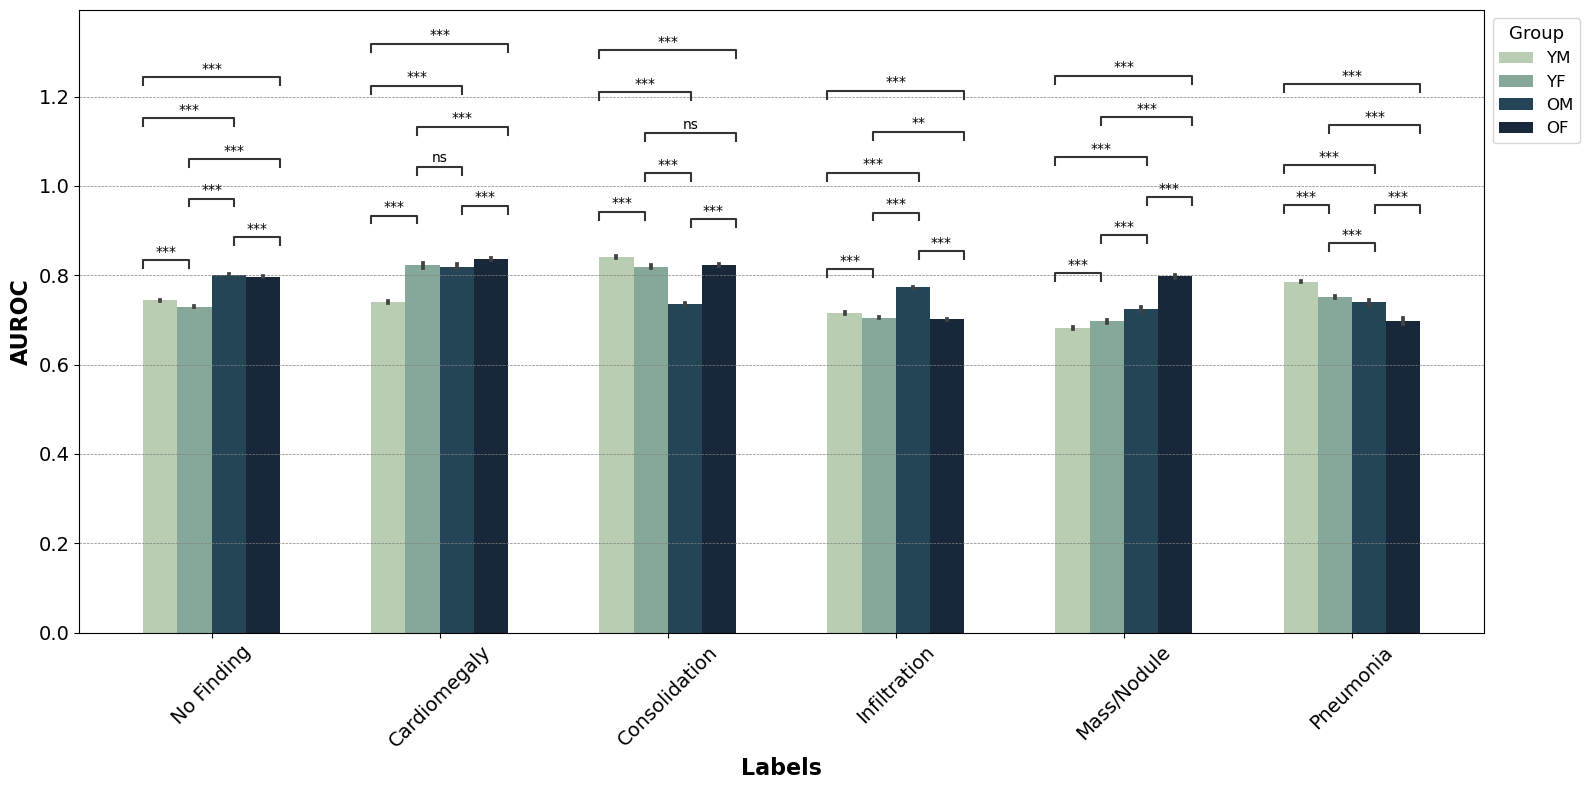

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03

Pneumonia_YF v.s. Pneumonia_OM: Custom statistical test, P_val:2.423e-129
Infiltration_YM v.s. Infiltration_YF: Custom statistical test, P_val:4.334e-39
Mass/Nodule_YM v.s. Mass/Nodule_YF: Custom statistical test, P_val:9.683e-23
Mass/Nodule_YF v.s. Mass/Nodule_OM: Custom statistical test, P_val:9.770e-36
Consolidation_OM v.s. Consolidation_OF: Custom statistical test, P_val:4.716e-66
Infiltration_OM v.s. Infiltration_OF: Custom statistical test, P_val:1.319e-09
Consolidation_YM v.s. Consolidation_YF: Custom statistical test, P_val:2.290e-10
Cardiomegaly_OM v.s. Cardiomegaly_OF: Custom statistical test, P_val:2.446e-02
No Finding_OM v.s. No Finding_OF: Custom statistical test, P_val:1.368e-40
No Finding_YM v.s. No Finding_YF: Custom statistical test, P_val:3.557e-17
No Finding_YF v.s. No Finding_OM: Custom statistical test, P_val:7.009e-33
Cardiomegaly_YM

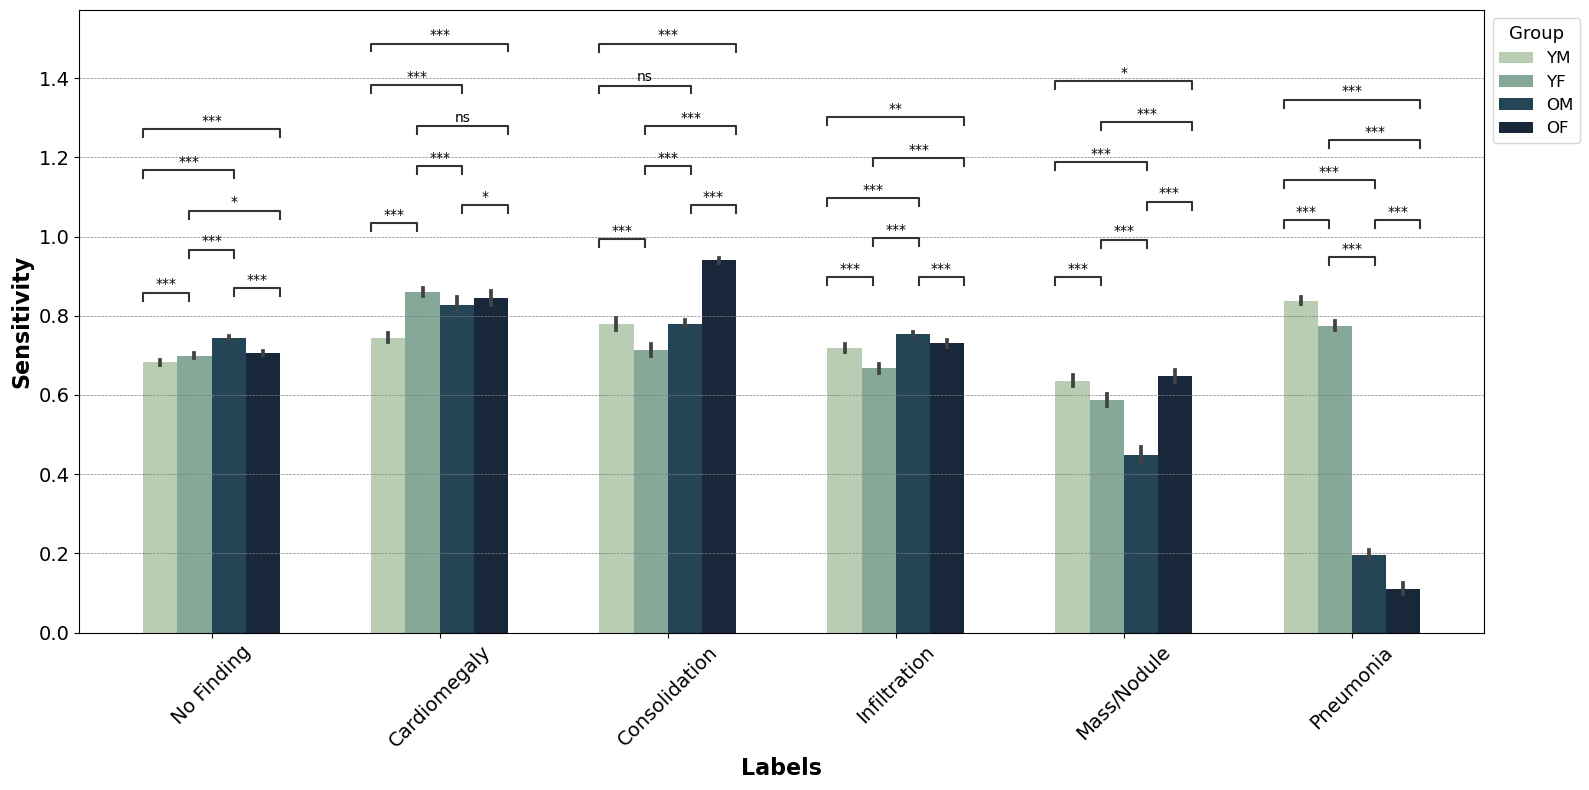

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03

Pneumonia_YF v.s. Pneumonia_OM: Custom statistical test, P_val:8.241e-100
Infiltration_YM v.s. Infiltration_YF: Custom statistical test, P_val:9.514e-22
Mass/Nodule_YM v.s. Mass/Nodule_YF: Custom statistical test, P_val:1.879e-43
Mass/Nodule_YF v.s. Mass/Nodule_OM: Custom statistical test, P_val:1.168e-59
Consolidation_OM v.s. Consolidation_OF: Custom statistical test, P_val:1.533e-49
Infiltration_OM v.s. Infiltration_OF: Custom statistical test, P_val:5.908e-59
Consolidation_YM v.s. Consolidation_YF: Custom statistical test, P_val:1.718e-31
Cardiomegaly_OM v.s. Cardiomegaly_OF: Custom statistical test, P_val:1.375e-15
No Finding_OM v.s. No Finding_OF: Custom statistical test, P_val:5.897e-58
No Finding_YM v.s. No Finding_YF: Custom statistical test, P_val:1.481e-42
No Finding_YF v.s. No Finding_OM: Custom statistical test, P_val:1.292e-65
Cardiomegaly_YM

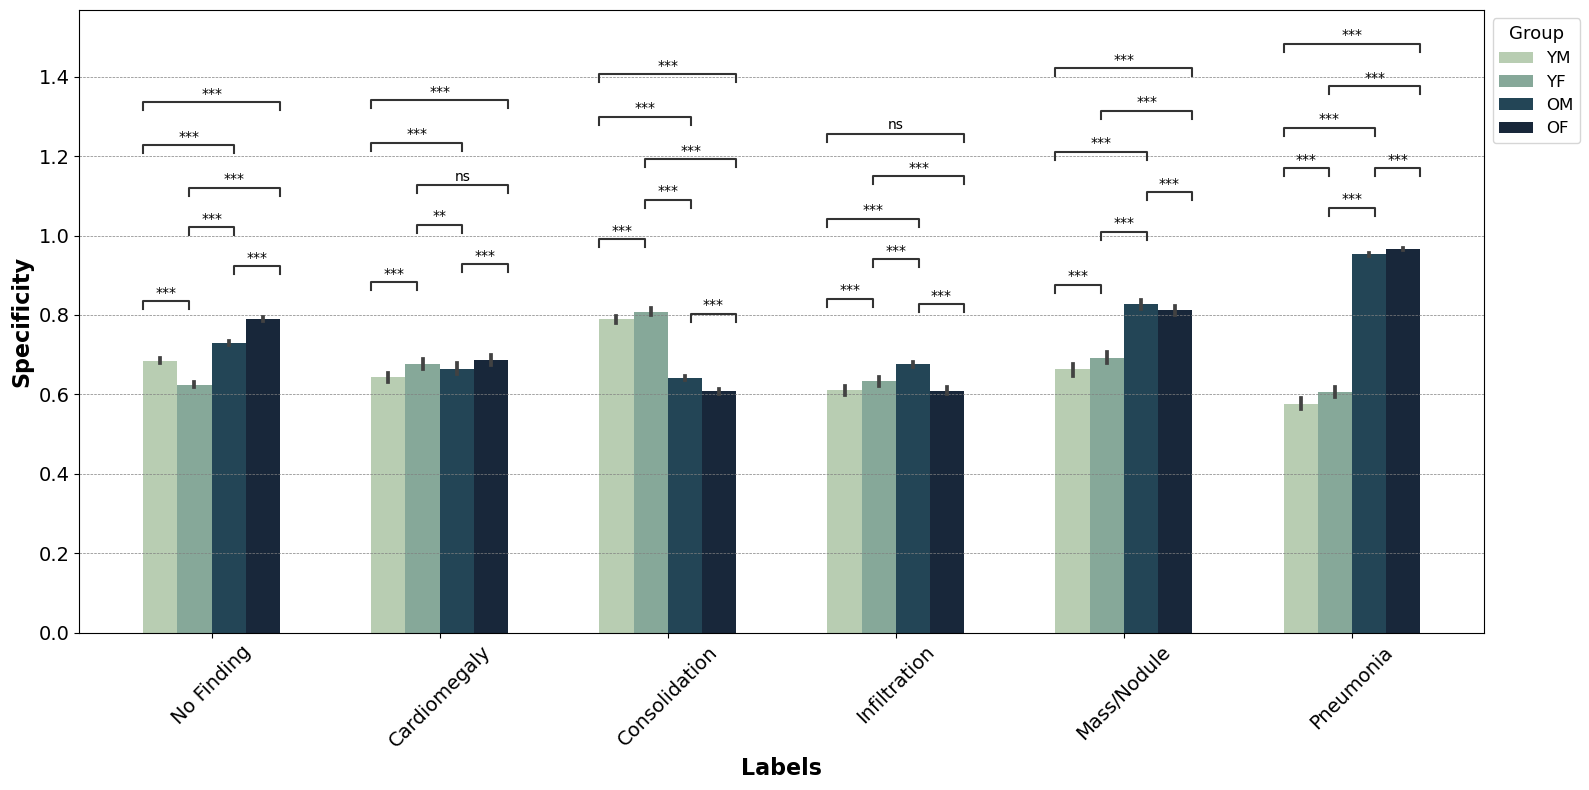

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03

Pneumonia_YF v.s. Pneumonia_OM: Custom statistical test, P_val:4.856e-36
Infiltration_YM v.s. Infiltration_YF: Custom statistical test, P_val:1.178e-04
Mass/Nodule_YM v.s. Mass/Nodule_YF: Custom statistical test, P_val:2.261e-55
Mass/Nodule_YF v.s. Mass/Nodule_OM: Custom statistical test, P_val:3.330e-05
Consolidation_OM v.s. Consolidation_OF: Custom statistical test, P_val:1.146e-95
Infiltration_OM v.s. Infiltration_OF: Custom statistical test, P_val:1.726e-95
Consolidation_YM v.s. Consolidation_YF: Custom statistical test, P_val:3.870e-10
Cardiomegaly_OM v.s. Cardiomegaly_OF: Custom statistical test, P_val:4.973e-106
No Finding_OM v.s. No Finding_OF: Custom statistical test, P_val:1.280e-41
No Finding_YM v.s. No Finding_YF: Custom statistical test, P_val:4.537e-19
No Finding_YF v.s. No Finding_OM: Custom statistical test, P_val:1.762e-57
Cardiomegaly_YM

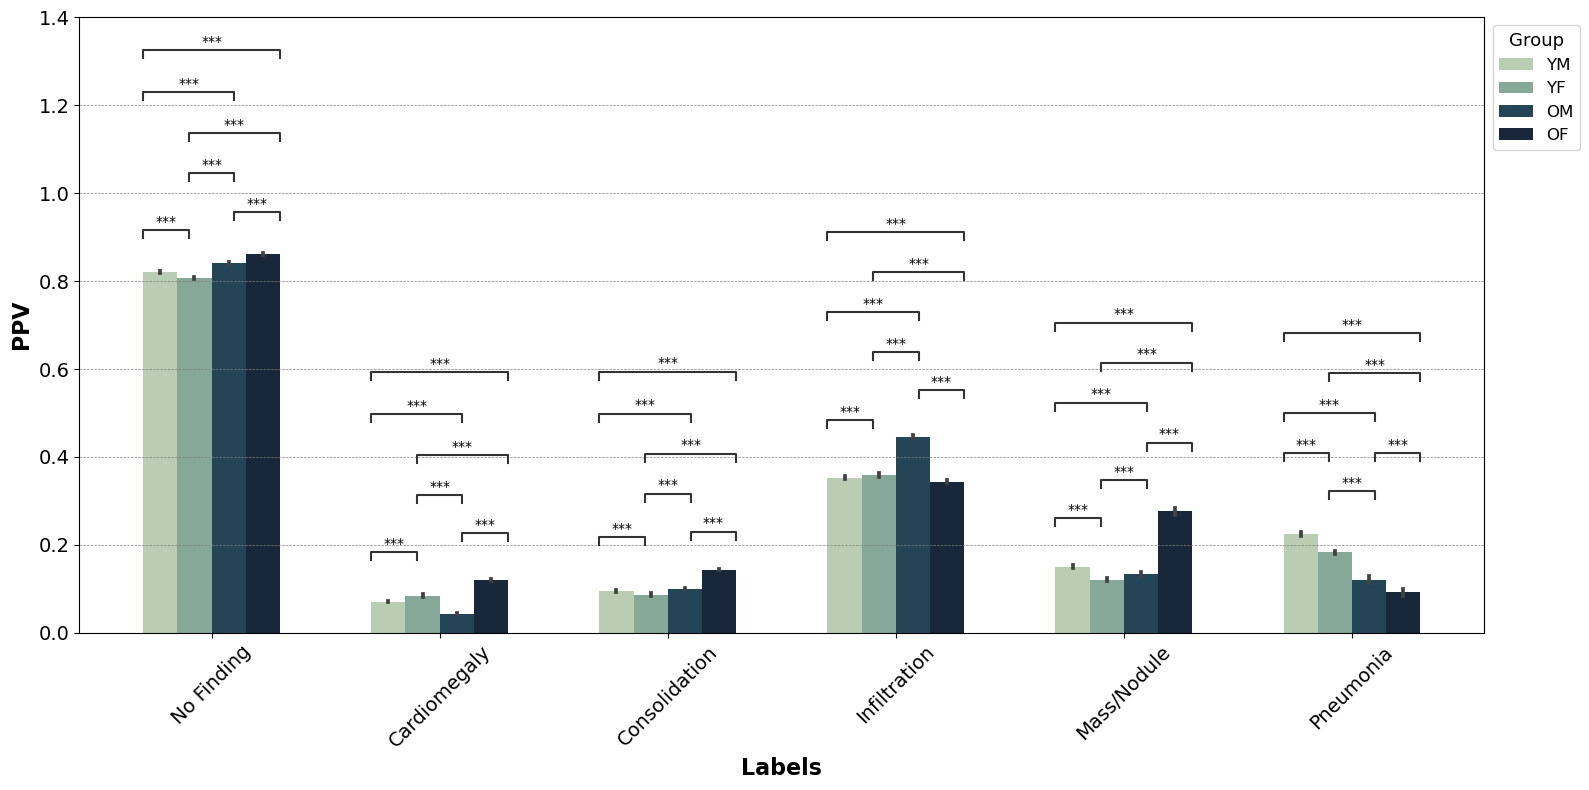

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03

Pneumonia_YF v.s. Pneumonia_OM: Custom statistical test, P_val:3.989e-58
Infiltration_YM v.s. Infiltration_YF: Custom statistical test, P_val:3.957e-36
Mass/Nodule_YM v.s. Mass/Nodule_YF: Custom statistical test, P_val:1.419e-35
Mass/Nodule_YF v.s. Mass/Nodule_OM: Custom statistical test, P_val:5.091e-07
Consolidation_OM v.s. Consolidation_OF: Custom statistical test, P_val:4.487e-53
Infiltration_OM v.s. Infiltration_OF: Custom statistical test, P_val:1.094e-01
Consolidation_YM v.s. Consolidation_YF: Custom statistical test, P_val:6.338e-04
Cardiomegaly_OM v.s. Cardiomegaly_OF: Custom statistical test, P_val:4.610e-29
No Finding_OM v.s. No Finding_OF: Custom statistical test, P_val:7.422e-03
No Finding_YM v.s. No Finding_YF: Custom statistical test, P_val:9.455e-26
No Finding_YF v.s. No Finding_OM: Custom statistical test, P_val:2.622e-92
Cardiomegaly_YM 

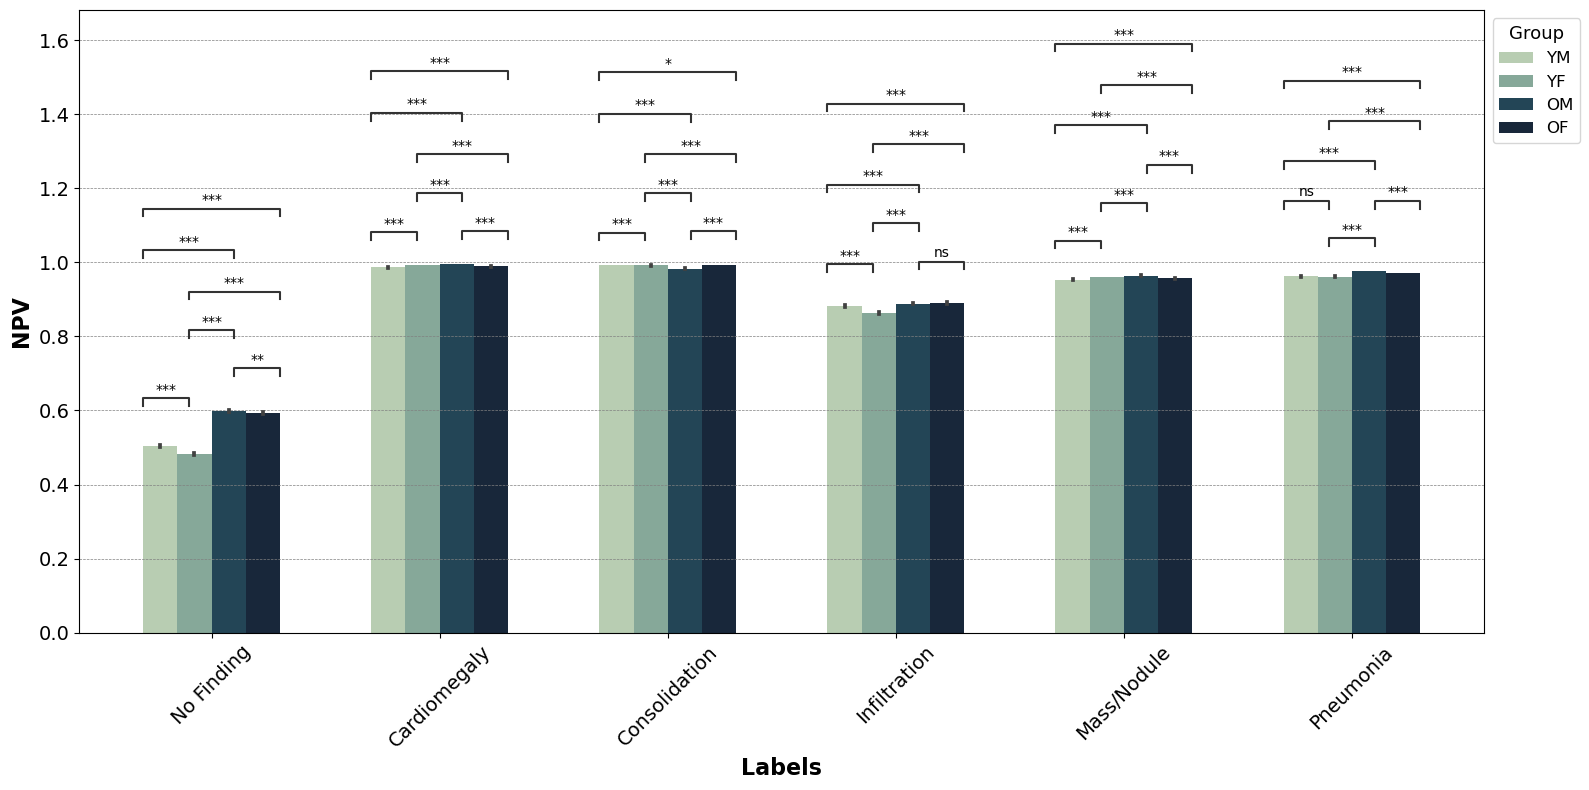

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03

Pneumonia_YF v.s. Pneumonia_OM: Custom statistical test, P_val:7.890e-73
Infiltration_YM v.s. Infiltration_YF: Custom statistical test, P_val:5.491e-05
Mass/Nodule_YM v.s. Mass/Nodule_YF: Custom statistical test, P_val:4.222e-53
Mass/Nodule_YF v.s. Mass/Nodule_OM: Custom statistical test, P_val:4.582e-01
Consolidation_OM v.s. Consolidation_OF: Custom statistical test, P_val:7.228e-96
Infiltration_OM v.s. Infiltration_OF: Custom statistical test, P_val:3.091e-82
Consolidation_YM v.s. Consolidation_YF: Custom statistical test, P_val:3.232e-10
Cardiomegaly_OM v.s. Cardiomegaly_OF: Custom statistical test, P_val:5.751e-113
No Finding_OM v.s. No Finding_OF: Custom statistical test, P_val:2.402e-20
No Finding_YM v.s. No Finding_YF: Custom statistical test, P_val:2.368e-03
No Finding_YF v.s. No Finding_OM: Custom statistical test, P_val:4.810e-51
Cardiomegaly_YM

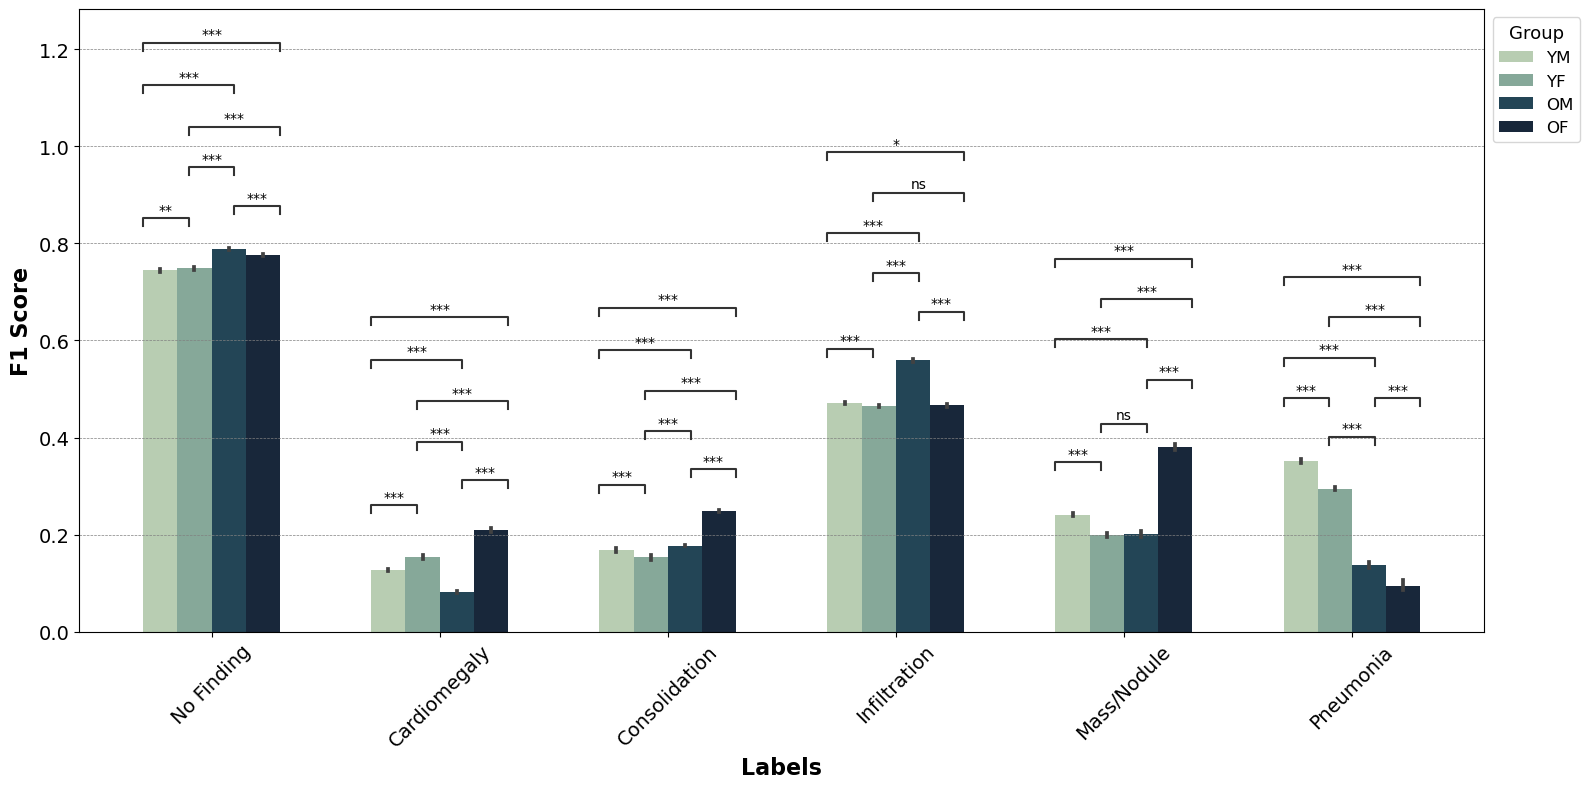

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03

Pneumonia_YF v.s. Pneumonia_OM: Custom statistical test, P_val:8.241e-100
Infiltration_YM v.s. Infiltration_YF: Custom statistical test, P_val:9.514e-22
Mass/Nodule_YM v.s. Mass/Nodule_YF: Custom statistical test, P_val:1.879e-43
Mass/Nodule_YF v.s. Mass/Nodule_OM: Custom statistical test, P_val:1.168e-59
Consolidation_OM v.s. Consolidation_OF: Custom statistical test, P_val:1.533e-49
Infiltration_OM v.s. Infiltration_OF: Custom statistical test, P_val:5.908e-59
Consolidation_YM v.s. Consolidation_YF: Custom statistical test, P_val:1.718e-31
Cardiomegaly_OM v.s. Cardiomegaly_OF: Custom statistical test, P_val:1.375e-15
No Finding_OM v.s. No Finding_OF: Custom statistical test, P_val:5.897e-58
No Finding_YM v.s. No Finding_YF: Custom statistical test, P_val:1.481e-42
No Finding_YF v.s. No Finding_OM: Custom statistical test, P_val:1.292e-65
Cardiomegaly_YM

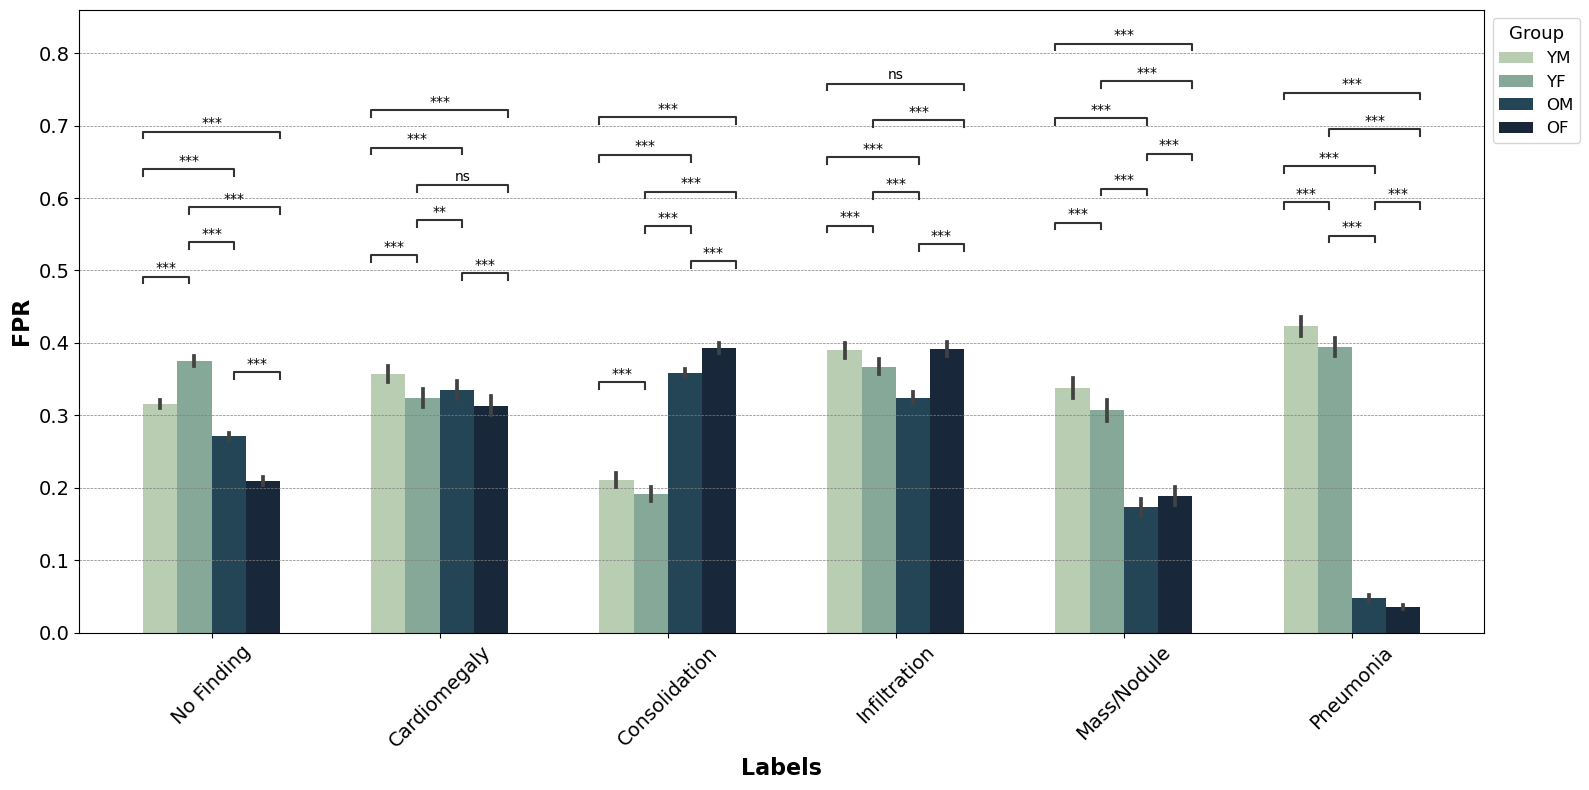

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03

Pneumonia_YF v.s. Pneumonia_OM: Custom statistical test, P_val:2.423e-129
Infiltration_YM v.s. Infiltration_YF: Custom statistical test, P_val:4.334e-39
Mass/Nodule_YM v.s. Mass/Nodule_YF: Custom statistical test, P_val:9.683e-23
Mass/Nodule_YF v.s. Mass/Nodule_OM: Custom statistical test, P_val:9.770e-36
Consolidation_OM v.s. Consolidation_OF: Custom statistical test, P_val:4.716e-66
Infiltration_OM v.s. Infiltration_OF: Custom statistical test, P_val:1.319e-09
Consolidation_YM v.s. Consolidation_YF: Custom statistical test, P_val:2.290e-10
Cardiomegaly_OM v.s. Cardiomegaly_OF: Custom statistical test, P_val:2.446e-02
No Finding_OM v.s. No Finding_OF: Custom statistical test, P_val:1.368e-40
No Finding_YM v.s. No Finding_YF: Custom statistical test, P_val:3.557e-17
No Finding_YF v.s. No Finding_OM: Custom statistical test, P_val:7.009e-33
Cardiomegaly_YM

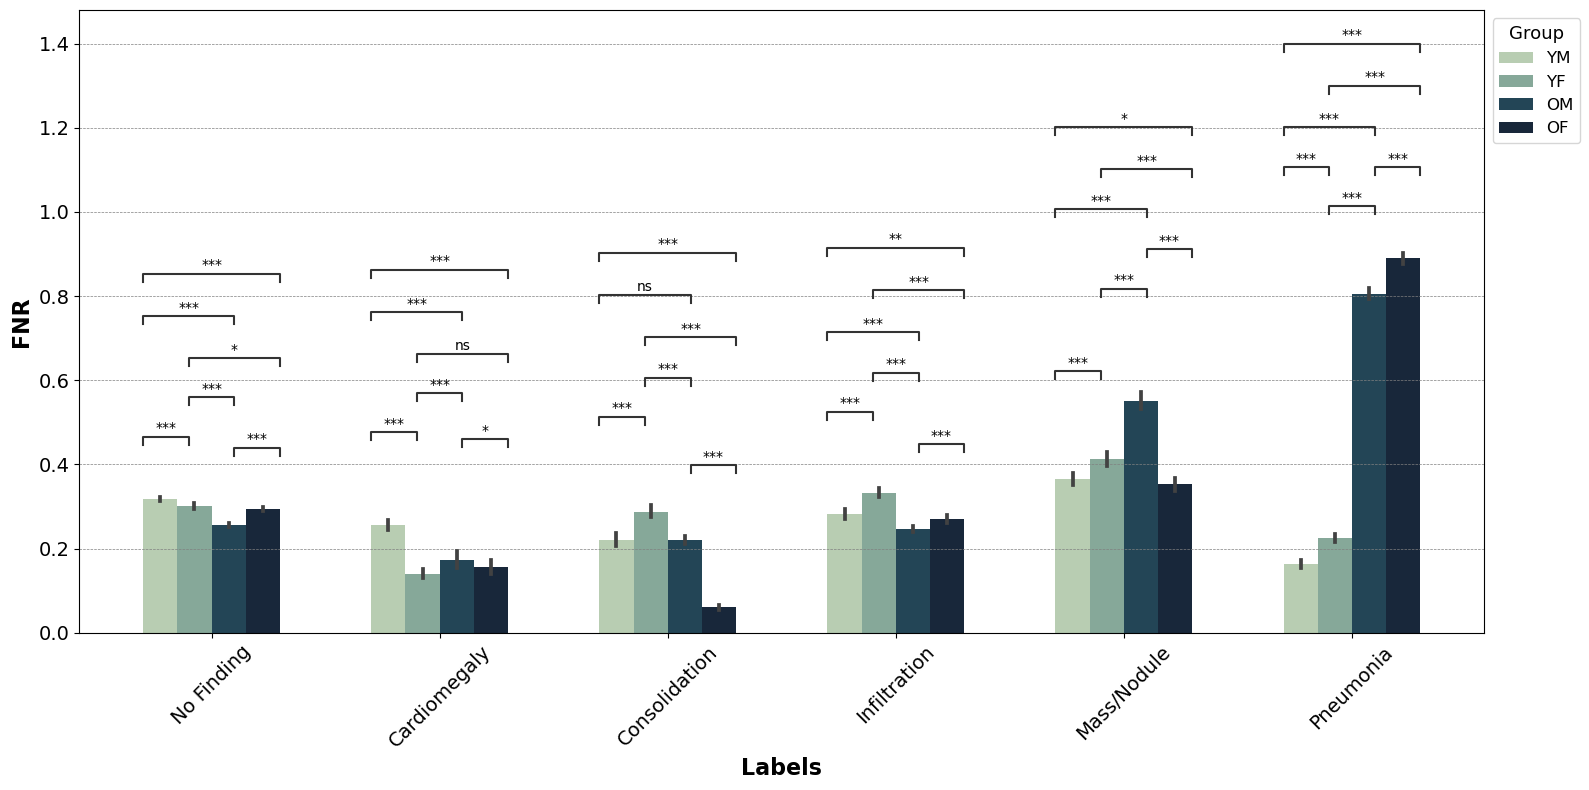

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
import pandas as pd


# Assuming 'parent' is already defined
# Load the CSV files for each group
metrics_YM_all = pd.read_csv(parent + "25variation/results/aggregate/analysis/csv/intersection/metrics_YM_all.csv")
metrics_YF_all = pd.read_csv(parent + "25variation/results/aggregate/analysis/csv/intersection/metrics_YF_all.csv")
metrics_OM_all = pd.read_csv(parent + "25variation/results/aggregate/analysis/csv/intersection/metrics_OM_all.csv")
metrics_OF_all = pd.read_csv(parent + "25variation/results/aggregate/analysis/csv/intersection/metrics_OF_all.csv")

# Add age and sex columns to metrics dataframes and combine them
metrics_YM_all['Group'] = 'YM'
metrics_YF_all['Group'] = 'YF'
metrics_OM_all['Group'] = 'OM'
metrics_OF_all['Group'] = 'OF'
combined_metrics = pd.concat([metrics_YM_all, metrics_YF_all, metrics_OM_all, metrics_OF_all])

# Assuming you have an updated aggregate_MF_stats.csv that includes comparisons between all groups
aggregate_intersection_stats = pd.read_csv(parent + "25variation/results/aggregate/analysis/csv/aggregate_intersection_stats.csv")


# Assuming 'parent' is already defined and the necessary DataFrames are loaded
# Define your unique metrics and labels as before
unique_metrics = aggregate_intersection_stats['Metric'].unique()
unique_labels = ["No Finding", "Cardiomegaly", "Consolidation", "Infiltration", "Mass/Nodule", "Pneumonia"]
palette = ["#b5d1ae", "#80ae9a", "#1b485e", "#122740"]

for metric in unique_metrics:
    fig, ax = plt.subplots(figsize=(16, 8))
    sns.barplot(x='Label', y=metric, hue='Group', data=combined_metrics, ax=ax, order=unique_labels, palette=palette, width=0.6)
    
    # Plot adjustments
    ax.set_xlabel('Labels', fontsize=16, fontweight='bold')
    ax.set_ylabel(metric, fontsize=16, fontweight='bold')
    ax.tick_params(axis='x', labelsize=14, rotation=45)
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(True, linestyle='--', linewidth=0.5, color='gray', axis='y')
    ax.legend(title='Group', title_fontsize='13', fontsize='12', loc='upper left', bbox_to_anchor=(1, 1))

    # Prepare a list of tuples for box_pairs for each comparison you're interested in
    box_pairs = [
        ((label, 'YM'), (label, 'YF')) for label in unique_labels
    ] + [
        ((label, 'YM'), (label, 'OM')) for label in unique_labels
    ] + [
        ((label, 'YM'), (label, 'OF')) for label in unique_labels
    ] + [
        ((label, 'YF'), (label, 'OM')) for label in unique_labels
    ] + [
        ((label, 'YF'), (label, 'OF')) for label in unique_labels
    ] + [
        ((label, 'OM'), (label, 'OF')) for label in unique_labels
    ]

    # Extract and assign p-values for statistical annotation, ensuring they match the box_pairs order
    p_values = []
    for pair in box_pairs:
        label, group1, group2 = pair[0][0], pair[0][1], pair[1][1]
        filtered_df = aggregate_intersection_stats[(aggregate_intersection_stats['Metric'] == metric) &
                                                   (aggregate_intersection_stats['Label'] == label) &
                                                   (aggregate_intersection_stats['Group1'] == group1) &
                                                   (aggregate_intersection_stats['Group2'] == group2)]
        if not filtered_df.empty:
            p_values.append(filtered_df['p_value_after_BH'].values[0])
        else:
            p_values.append(np.nan)  # Placeholder for missing p-values

    # Add statistical annotation
    add_stat_annotation(ax, data=combined_metrics, x='Label', y=metric, hue='Group',
                        box_pairs=box_pairs, perform_stat_test=False, pvalues=p_values, 
                        test_short_name='Custom', verbose=2, 
                        pvalue_thresholds=[(0.001, '***'), (0.01, '**'), (0.05, '*'), (1, 'ns')])
    
    # Save the plot
    plt.tight_layout()
    plot_file_path = parent + f'25variation/results/aggregate/analysis/plot/intersection/{metric}_comparison.jpeg'
    plt.savefig(plot_file_path, format='jpeg')
    plt.show()
    plt.close(fig)
